<a href="https://colab.research.google.com/github/mviganalk/Project_Colab_Weather/blob/main/Weather_EDA_Plotly_%26_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Data Analysis with Plotly & Matplotlib
Welcome to Exploratory Data Analysis with Plotly! In this notebook, we will embark on an interactive journey to explore a rich dataset containing daily weather information for capital cities around the world. This dataset is packed with over 40 diverse weather-related features, making it a goldmine for climate trend analysis and global weather pattern identification


#Description Dataset
This dataset provides daily weather information for capital cities around the world. Unlike forecast data, this dataset offers a comprehensive set of features that reflect the current weather conditions around the world.
Starting from August 29, 2023.
It provides over 40+ features , including temperature, wind, pressure, precipitation, humidity, visibility, air quality measurements and more. The dataset is valuable for analyzing Global weather patterns, exploring climate trends, and understanding the relationships between different weather parameters.

##Objective
Our primary objective is to conduct an engaging and interactive exploratory data analysis (EDA) using the powerful Plotly & Matplotlib library while keeping this notebook beginner-friendly. Through interactive visualizations, we aim to unlock insights from the data, understand weather trends, and reveal relationships between different weather parameters.

In this journey of data exploration, we'll harness the capabilities of Plotly & Matplotlib to create dynamic and interactive plots. These visualizations will not only make the analysis more informative but also user-friendly for individuals with varying levels of data analysis experience.

So, let's embark on this data-driven adventure and start unraveling the fascinating world of weather data through interactive exploration! 🌟

In [38]:
# Import necessary libraries

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [7]:
#Import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1VARoFz8ReXq-3h-Nk_hi6N1wGChWymWpC8BHuMNa1jY/edit#gid=1701969590'
sheet_url_replace = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert the spreadsheet format into csv

print(sheet_url_replace) #To show the link to csv

df_weather = pd.read_csv(sheet_url_replace) #to load/read the csv into pandas dataframe
df_weather.head(10) #Show only first 5 rows (To see how the dataset lookslike without)

https://docs.google.com/spreadsheets/d/1VARoFz8ReXq-3h-Nk_hi6N1wGChWymWpC8BHuMNa1jY/export?format=csv&gid=1701969590


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24,18:24,17:39,02:48,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04,19:19,18:50,03:25,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16,19:21,18:46,03:50,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16,20:34,20:08,04:38,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11,18:06,16:43,04:41,Waxing Gibbous,93
5,Antigua and Barbuda,Saint John's,17.12,-61.85,America/Antigua,1693301400,2023-08-29 05:30,29.0,84.2,Light rain,...,0.8,1.9,1,1,05:53,18:23,17:36,04:09,Waxing Gibbous,93
6,Argentina,Buenos Aires,-34.59,-58.67,America/Argentina/Buenos_Aires,1693301400,2023-08-29 06:30,9.0,48.2,Clear,...,2.1,3.5,1,1,07:18,18:34,16:57,06:32,Waxing Gibbous,93
7,Armenia,Yerevan,40.18,44.51,Asia/Yerevan,1693301400,2023-08-29 13:30,31.0,87.8,Partly cloudy,...,5.0,6.2,1,1,06:26,19:39,19:05,03:45,Waxing Gibbous,93
8,Australia,Canberra,-35.28,149.22,Australia/Sydney,1693301400,2023-08-29 19:30,13.0,55.4,Clear,...,4.0,5.8,1,1,06:27,17:42,15:19,05:17,Waxing Gibbous,93
9,Austria,Vienna,48.20,16.37,Europe/Vienna,1693301400,2023-08-29 11:30,16.0,60.8,Light rain,...,13.1,14.9,1,2,06:07,19:43,19:27,03:11,Waxing Gibbous,93


In [8]:
# Import necessary libraries

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

#Basic Data Exploration

In [9]:
df_weather = pd.read_csv(sheet_url_replace)

In [10]:
# This will display all columns without truncation
pd.set_option('display.max_columns', None)

In [11]:
df_weather.sample(4)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
5175,Mexico,Mexico City,19.43,-99.13,America/Mexico_City,1695507300,2023-09-23 16:15,28.0,82.4,Partly cloudy,13.6,22.0,350,N,1023,30.21,0.00,0.00,23,25,26.9,80.5,19.0,11,7,8.7,14.1,257.0,153.1,2.6,20.5,23.9,25.4,2,2,06:25,18:32,14:13,00:10,Waxing Gibbous,52
1706,Saint Vincent and the Grenadines,Kingstown,13.13,-61.22,America/St_Vincent,1693955700,2023-09-05 19:15,28.7,83.7,Light rain shower,15.9,25.6,79,E,1013,29.92,0.60,0.02,76,66,33.3,91.9,10.0,6,1,25.9,41.8,196.9,33.3,0.2,0.2,2.5,6.1,1,1,05:54,18:13,22:45,11:06,Waning Gibbous,70
220,Bulgaria,Sofia,42.68,23.32,Europe/Sofia,1693363500,2023-08-30 05:45,17.0,62.6,Light rain shower,4.3,6.8,330,NNW,1007,29.74,0.50,0.02,88,75,17.0,62.6,10.0,6,1,2.5,4.0,237.0,9.8,6.4,0.3,10.3,12.4,1,1,06:49,20:05,20:11,05:30,Full Moon,98
6088,El Salvador,San Salvador,13.71,-89.20,America/El_Salvador,1695940200,2023-09-28 16:30,29.0,84.2,Partly cloudy,11.9,19.1,180,S,1010,29.83,0.59,0.02,75,50,36.9,98.4,10.0,6,6,5.7,9.3,383.9,65.8,4.8,12.3,11.2,13.8,1,1,05:46,17:49,17:32,04:56,Waxing Gibbous,97


In [31]:
temp=df_weather[['country','location_name']].groupby('country').count()
temp.sort_values('location_name')

,location_name
country,
Timor-Leste,32
Spain,41
Kiribati,42
Samoa,42
Peru,42
...,...
Madagascar,86
Russia,86
Turkey,86


So, there are about 11 to 66 locations per country that collect the present data

In [32]:
print("Current data covers date\nFrom: ",df_weather.last_updated.min(),"\nTo:",df_weather.last_updated.max())

Current data covers date
From:  2023-08-29 02:45 
To: 2023-10-10 10:15


##The hottest place

In [33]:
df_weather[['country','location_name','temperature_celsius','last_updated']][df_weather['temperature_celsius']==df_weather.temperature_celsius.max()]

,country,location_name,temperature_celsius,last_updated
184,United Arab Emirates,Abu Dhabi,45.0,2023-08-29 13:45


##The coolest place

In [34]:
df_weather[['country','location_name','temperature_celsius','last_updated']][df_weather['temperature_celsius']==df_weather.temperature_celsius.min()]

,country,location_name,temperature_celsius,last_updated
6540,Mongolia,Ulaanbaatar,-5.0,2023-10-01 06:15
7125,Mongolia,Ulaanbaatar,-5.0,2023-10-04 05:30
7320,Mongolia,Ulaanbaatar,-5.0,2023-10-05 05:30
7905,Mongolia,Ulaanbaatar,-5.0,2023-10-08 05:15
8100,Mongolia,Ulaanbaatar,-5.0,2023-10-09 05:00
8295,Mongolia,Ulaanbaatar,-5.0,2023-10-10 05:15


##Highest Precipitation

In [35]:
df_weather[['country','location_name','precip_mm','last_updated']][df_weather['precip_mm']==df_weather.precip_mm.max()]

,country,location_name,precip_mm,last_updated
1631,Haiti,Port-Au-Prince,31.0,2023-09-05 19:15


##Most Humidity

In [36]:
df_weather[['country','location_name','humidity','last_updated']][df_weather['humidity']==df_weather.humidity.max()].sort_values('last_updated',ascending=False).head(1)

,country,location_name,humidity,last_updated
8340,Solomon Islands,Honiara,100,2023-10-10 08:15


In [12]:
numeric = df_weather.describe(include=np.number)
categoric = df_weather.describe(include="object")

In [13]:
#Summary Statistic for Numerical features
numeric


,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,8376.000000,8376.000000,8.376000e+03,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000
mean,19.301712,21.900500,1.695078e+09,22.200549,71.961509,6.682533,10.755146,164.204274,1013.889565,29.939226,0.170006,0.006557,72.233166,32.633238,23.930957,75.069293,9.768326,5.781280,2.259551,10.667920,17.169031,531.334348,41.385757,11.256793,6.524152,22.350979,37.203713,1.517192,2.169651,55.812321
std,24.584147,65.677178,1.067515e+06,6.873125,12.371939,4.772097,7.680980,104.505324,6.026160,0.177863,0.897884,0.035387,20.543817,32.431953,9.115349,16.407168,2.505916,1.554399,2.265635,6.796171,10.937173,1266.462746,32.188229,20.140792,14.430969,63.032969,93.831422,0.948181,2.286624,34.917097
min,-41.300000,-175.200000,1.693301e+09,-5.000000,23.000000,2.200000,3.600000,1.000000,982.000000,29.000000,0.000000,0.000000,4.000000,0.000000,-10.200000,13.700000,0.000000,0.000000,1.000000,0.000000,0.000000,96.800000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,0.000000
25%,3.750000,-6.840000,1.694128e+09,17.000000,62.600000,3.100000,5.000000,74.000000,1010.000000,29.830000,0.000000,0.000000,62.000000,0.000000,17.000000,62.600000,10.000000,6.000000,1.000000,5.600000,9.000000,223.600000,18.100000,1.100000,0.400000,3.200000,5.700000,1.000000,1.000000,22.000000
50%,17.250000,23.240000,1.695076e+09,23.000000,73.400000,5.600000,9.000000,160.000000,1013.000000,29.910000,0.000000,0.000000,77.000000,25.000000,24.900000,76.800000,10.000000,6.000000,1.000000,9.400000,15.100000,273.700000,37.200000,3.900000,1.500000,8.000000,13.500000,1.000000,1.000000,60.000000
75%,41.330000,50.580000,1.696024e+09,27.000000,80.600000,9.400000,15.100000,250.000000,1018.000000,30.060000,0.000000,0.000000,88.000000,60.000000,30.300000,86.500000,10.000000,6.000000,2.000000,14.100000,22.800000,433.900000,57.900000,12.225000,5.700000,19.900000,32.125000,2.000000,2.000000,91.000000
max,63.830000,179.220000,1.696886e+09,45.000000,113.000000,87.700000,141.100000,360.000000,1036.000000,30.590000,31.000000,1.220000,100.000000,100.000000,73.600000,164.400000,32.000000,19.000000,10.000000,68.700000,110.500000,36315.898000,320.400000,329.000000,169.800000,1558.800000,2504.300000,6.000000,10.000000,100.000000


In [14]:
#Summary Statistic for Categorical features
categoric

,country,location_name,timezone,last_updated,condition_text,wind_direction,sunrise,sunset,moonrise,moonset,moon_phase
count,8376,8376,8376,8376,8376,8376,8376,8376,8376,8376,8376
unique,185,197,183,1333,24,16,195,217,1396,1428,8
top,Bulgaria,Kabul,Europe/Rome,2023-09-14 16:30,Partly cloudy,N,05:54,18:04,No moonrise,No moonset,Waning Gibbous
freq,129,43,129,47,3269,986,158,147,390,194,2339


#Plotly Linechart

In [15]:
# Temperature Trends
trend = df_weather.query("country in ['Brazil', 'New Zealand', 'Spain', 'Indonesia']")

In [16]:
# Selected Countires Temperature Trends
fig = px.line(trend,x='last_updated',y='temperature_celsius',title="Temperature Trends",color="country",markers=True,text="humidity")
fig.update_xaxes(title="Last Updated")
fig.update_yaxes(title="Temperature (°C)")
# Customize the text labels
fig.update_traces(
    #texttemplate='%{y}°C<br>Humidity: %{text}%',  # Customized text label format
    textposition='top center',  # Adjust text label position
    textfont=dict(size=12),  # Adjust text label font size
)

# Customize the legend
fig.update_layout(
    legend_title_text='Country',# Change the legend title
    height=600,
    width=1000
)
# Customize the line and marker styles
fig.update_traces(
    line=dict(width=3),  # Adjust line width
    marker=dict(size=12, line=dict(width=1, color='DarkSlateGrey')),  # Adjust marker size and outline
)


fig.show()

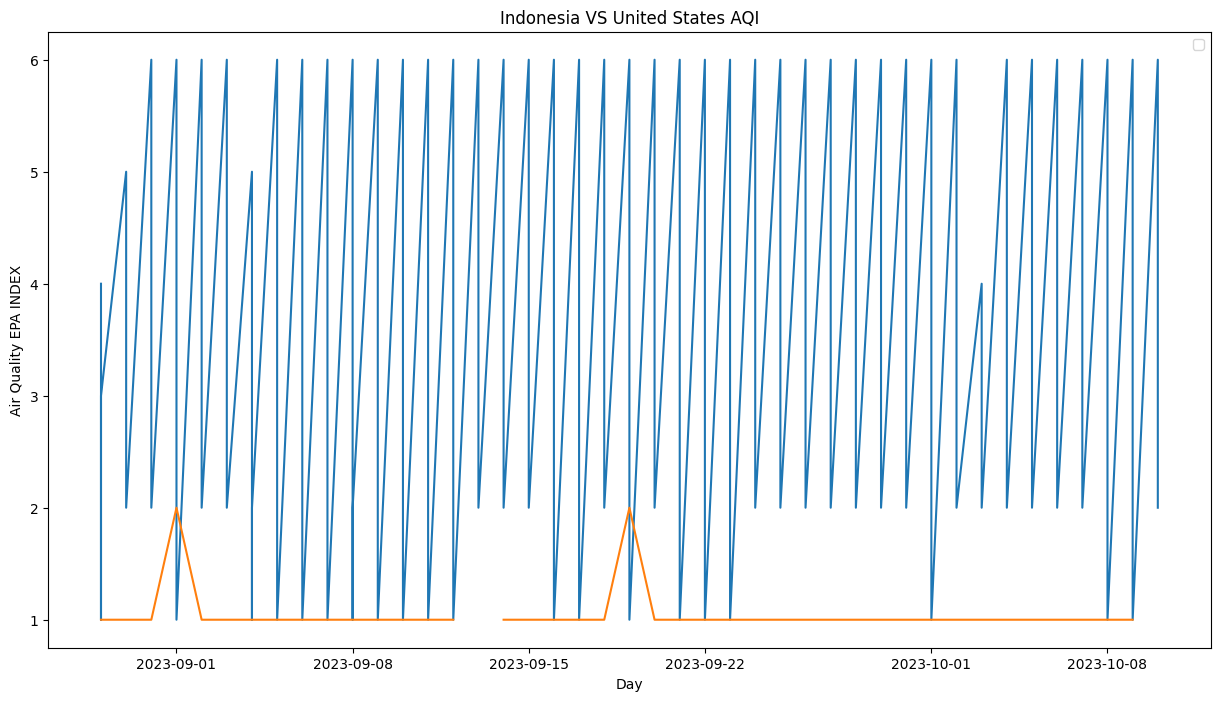

In [40]:
df_weather['last_updated_date'] = pd.to_datetime(df_weather['last_updated']).dt.date
df_weather['last_updated_time'] = pd.to_datetime(df_weather['last_updated']).dt.time
Indonesia=df_weather[['country','air_quality_us-epa-index','last_updated_date']][df_weather['country']=='Indonesia'].set_index('last_updated_date')
US=df_weather[['country','air_quality_us-epa-index','last_updated_date']][df_weather['country']=='United States of America'].set_index('last_updated_date')
indoUS=Indonesia.join(US,lsuffix='IND',rsuffix='US')
plt.figure(figsize=(15,8))
plt.plot(indoUS.index,indoUS['air_quality_us-epa-indexIND'])
plt.plot(indoUS.index,indoUS['air_quality_us-epa-indexUS'])
plt.xlabel('Day')
plt.ylabel('Air Quality EPA INDEX')
plt.title('Indonesia VS United States AQI')
plt.legend()
plt.show()

#Plotly Barchart

In [17]:
# Grouped the countries get the mean temperature
grouped_data = df_weather.groupby(['country'])['temperature_celsius'].mean().reset_index()
# Get the counties which have low temperature
low_temp = grouped_data.query('temperature_celsius < 13')

In [18]:
# Counties Temperatures Below 13°C degree
barchart = px.bar(low_temp, x="country", y="temperature_celsius", title="Temperatures Below 13°C", color="country", height=600)
barchart.update_xaxes(title="Country")
barchart.update_yaxes(title="Mean Temperature (°C)")
# Add data labels on top of bars
barchart.update_traces(texttemplate="%{y:.2f}°C", textposition="outside")
# Add interactive legends
barchart.update_layout(showlegend=True)
# Customize color palette
barchart.update_traces(marker=dict(line=dict(color='rgb(0,0,0)', width=0.3)))
# Customize hover information
barchart.update_traces(hovertemplate="<b>%{x}</b><br>Mean Temperature: %{y:.2f}°C")
# Customize the legend title
barchart.update_layout(legend_title_text='Country')


barchart.show()

In [19]:
# Counties Weather Condition
barchart = px.histogram(df_weather, x="condition_text", title="Weather Condition", color="condition_text", height=600, width=1200)
barchart.update_xaxes(title="Weather Condition")
barchart.update_yaxes(title="Count")

# Add data labels on top of bars
barchart.update_traces(texttemplate="Count %{y:2f}", textposition="outside")
# Add interactive legends
barchart.update_layout(showlegend=True)
# Customize color palette
barchart.update_traces(marker=dict(line=dict(color='rgb(0,0,0)', width=0.3)))
# Customize hover information
barchart.update_traces(hovertemplate="<b>%{x}</b><br>Count: %{y:2f}")
# Customize the legend title
barchart.update_layout(legend_title_text="Weather Condition")

barchart.show()

#Plotly Sunburn Chart

In [20]:
zone = ['Asia/Kabul', 'Europe/Tirane', 'Africa/Algiers', 'Europe/Andorra','Africa/Luanda', 'America/Antigua','America/Argentina/Buenos_Aires','Australia/Sydney',
        'Europe/Vienna','Asia/Bahrain', 'Asia/Dhaka','Europe/Brussels', 'America/Belize','America/Manaus', 'Asia/Brunei','Africa/Ouagadougou','Atlantic/Cape_Verde',
        'Asia/Phnom_Penh', 'Africa/Douala', "Asia/Bangkok"]

In [21]:
weather_zones = df_weather.query("timezone in @zone")
# Create the Sunburst chart
fig = px.sunburst(
    weather_zones,
    path=['timezone', 'country'], # Define the hierarchical path
    values='temperature_celsius', # Add values
    height=600,
    color='temperature_celsius',  # Color based on temperature
    color_continuous_scale='thermal', # Use the Temps color scale
    color_continuous_midpoint=np.mean(weather_zones['temperature_celsius']), # Set color midpoint to the median temperature
    labels={'temperature_celsius': 'Temperature (°C)'},  # Customize the colorbar label
)
# Set title
fig.update_layout(
    title="Average Temperature by Time Zone and Country",
)

fig.show()

#Plotly Polar Chart

In [22]:
fig = px.scatter_polar(
    weather_zones,
    r="wind_kph", # Radial distance represents wind speed in kilometers per hour
    theta="wind_direction", # Angular position represents wind direction
    color="temperature_celsius", # Color represents temperature in degrees Celsius
    color_continuous_scale = "viridis", # Use viridis color scale
    title="Wind Speed and Wind Direction",
    labels={'temperature_celsius': 'Temperature (°C)'}, # Customize the colorbar label
    height=600, # Add height to the polar chart
    hover_name="location_name", # Add location names as hover text
)

fig.show()

#Plotly Scatter Plot

In [23]:
fig = px.scatter(
    weather_zones,
    x="temperature_celsius",
    y="humidity",
    color="temperature_celsius",
    color_continuous_scale = "tempo",
    size='wind_kph', # Size of data points based on wind speed in kph
    hover_name='country', # Add hover value
    hover_data=['location_name'],  # Additional data to show on hover (location_name)
    labels=
        {
            'temperature_celsius': 'Temperature (°C)',
            'humidity': 'Humidity',
            'wind_kph': 'Wind speed (kph)',
            'country': 'Country',
            'condition_text': 'Weather Condition',
            'location_name': 'City'
        },
    title="Temperature and Humidity with Wind Speed",
    height=600,
    )
fig.update_xaxes(title="Temperature (°C)")
fig.update_yaxes(title="Humidity")


fig.show()

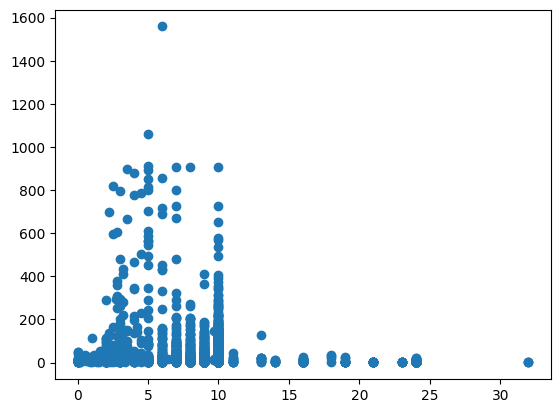

In [41]:
#visibility & air quality

plt.scatter(df_weather['visibility_km'],df_weather['air_quality_PM2.5'])

#Plotly Pie Chart

In [24]:
# Group the weather condition and calculate the mean of temperature
weather_status = weather_zones.groupby('condition_text')['temperature_celsius'].agg(['mean']).reset_index()
# Rename the columns
weather_status = weather_status.rename(columns={'mean': 'temperature'})
weather_status

,condition_text,temperature
0,Clear,20.712045
1,Cloudy,30.260000
2,Fog,18.900000
3,Light drizzle,19.450000
4,Light rain,23.400000
5,Light rain shower,21.468421
6,Mist,18.130556
7,Moderate or heavy rain shower,23.260000
8,Moderate or heavy rain with thunder,25.555556
9,Moderate rain,21.450000


In [25]:
fig = px.pie(
    weather_status,
    names='condition_text',
    values='temperature',
    title='Weather Condition And Temperature',
    height=600,
    labels=(
        {
            'condition_text': 'Weather Condition',
            'temperature': 'Temperature (°C)'
        }
    )
)
# Add labels inside the pie chart section
fig.update_traces(textposition='inside', textinfo='label+percent')

fig.show()

In [26]:
# Group the moon phases and calculate the mean of moon illumination
weather_zones_moon = weather_zones.groupby('moon_phase')['moon_illumination'].agg(['mean']).reset_index()
# Rename the columns
weather_zones_moon = weather_zones_moon.rename(columns={'mean': 'moon_illumination'})
weather_zones_moon

,moon_phase,moon_illumination
0,First Quarter,41.000000
1,Full Moon,98.666667
2,Last Quarter,58.000000
3,New Moon,1.000000
4,Waning Crescent,30.222222
5,Waning Gibbous,86.666667
6,Waxing Crescent,11.305389
7,Waxing Gibbous,79.142857


In [27]:
fig = px.pie(
    weather_zones_moon,
    names='moon_phase',
    values='moon_illumination',
    title='Moon Phase and Moon Illumination',
    height=600,
    hole=0.4,
    labels=(
        {
            'moon_phase': 'Moon Phase',
            'moon_illumination': 'Moon Illumination (%)'
        }
    ),
)
# Add labels inside the pie chart section
fig.update_traces(textposition='inside', textinfo='label+percent')

fig.show()

#Plotly Gauge Chart

In [28]:
# finding Temperature mean
temperature_max = df_weather['temperature_celsius'].max()
temperature_min = df_weather['temperature_celsius'].min()
temperature_mean = df_weather['temperature_celsius'].mean()

In [29]:
fig = go.Figure(go.Indicator(
    mode="gauge+number", # Set the chart mode to gauge with a number
    value= temperature_mean, # Set the value
    title={'text' : 'Temperature (°C)'},  # Set the title of the gauge chart
    gauge= { 'axis' : {'range' : [None, temperature_max]}, # Define the gauge axis range
            'steps' : [
                {'range' : [0, 10], 'color' : "seashell"}, # Define seashell color ranges for the gauge
                {'range' : [10, 20], 'color' : "lightblue"}, # Define lightblue color ranges for the gauge
                {'range' : [20, 30], 'color' : "sandybrown"}, # Define sandybrown color ranges for the gauge
                {'range' : [30, temperature_max], 'color' : "tomato"} # Define tomato color ranges for the gauge
            ],
            'threshold' : {
                'line' : {'color' : 'red', 'width' : 4}, # Define the threshold line's appearance
                'thickness' : 0.75, # Set the thickness of the threshold line
                'value' : temperature_mean # Set the value where the threshold line is located
            }
    }
))
fig.update_layout(
    title = "Temperature Status", # Define the title
    height=400 # Define the height
)

fig.show()

#Plotly Mapbox Chart

In [30]:
fig = px.scatter_mapbox(
    df_weather,
    lat="latitude",  # Latitude data column
    lon="longitude", # Longitude data column
    color="temperature_celsius", # Color data for points
    color_continuous_scale=px.colors.cyclical.IceFire, # Color scale
    hover_name= 'location_name', # Add hover value
    size="humidity", # Based on size data will change
    size_max=7,  # Maximum size for points
    labels=(
{
            'latitude': 'Latitude',
            'longitude': 'Longitude',
            'temperature_celsius' : 'Temperature (°C)',
            'humidity': 'Humidity'
        }),
    height=600,
    width=1000
    )

fig.update_layout(
    mapbox_style='open-street-map', # Map style
    title="Temperature and Humidity ",  # Title of the map
    hovermode='closest',  # Hover mode for interactivity
    mapbox=dict(
        bearing=0, # Bearing of the map
         center=go.layout.mapbox.Center(
            lat=47, # Center latitude
            lon=12 # Center longitude
        ),
        pitch=0, # Map pitch
        zoom=4 # Initial map zoom level
    )
)

fig.show()

#Insight Weather
The following is an insight into weather data around the world from late August to early October.
#### (1) Linechart
Brazil, which represents the South American continent, has a temperature trend that has increased significantly over the past 3 months. Meanwhile, Indonesia is experiencing a stable weather trend with an average of 28-30 Celsius.
#### (2) Barchart
The average temperature that has a temperature below 13 Celsius is on the European continent. and mostly weather conditions are mostly cloudy and clear around the world.
#### (3) Sunburn Chart
The continents of europe and australia have an average temperature based on time zones that is below 20 Celsius. while the continents of asia have an average temperature of 25-30 Celsius. and the average temperature of the continents of africa and south america has a temperature above 25 C.
#### (4) Polar Chart
Generally, wind speed and direction experience differences in speed and differences in direction, the following wind speeds and directions above 25 kph are west, northwest, southwest, and southeast.
#### (5) Scatter Plot
High Humidity with Lower Temperatures:
Generally, when humidity levels in a region are high, temperatures tend to be lower. This is because humidity acts as a natural coolant. When the air is humid, heat energy must be used to evaporate the water vapor in the air, which results in a decrease in air temperature. This is why humid regions tend to have lower average temperatures than dry regions.

Low Humidity with Higher Temperatures:
Conversely, when humidity levels are low, the air tends to be drier. Under these conditions, heat energy is not used to evaporate as much water vapor, so the air temperature can rise faster. This is the reason why desert regions with low humidity often have very high temperatures during the day.

High humidity can reduce air pressure differences and reduce pressure gradients, which in turn can result in lower wind speeds. Humid air is usually less inclined to flow quickly, as the heat energy released during condensation reduces the air pressure difference.

#### (6) Pie Chart
moon phases and moon illumination most often appear in the last 3 months, namely full moon, waning gibbous, and waxing gibbous. with the air at night clear and cloudy.
#### (7) Gauge Chart
The average temperature around the world based on the last 3 months of data is at 22.2 Celsius.
#### (8) Mapbox Chart
The continents of Europe and Australia mostly have temperatures below 20 Celsius, while the continents of Latin and South America, Africa, and Asia have temperatures above 20 Celsius.